In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from omegaconf import DictConfig
import os
import matplotlib.pyplot as plt

import vsa_ogm.dataloaders.functional as hogmf

plt.rcParams['text.usetex'] = True

In [13]:
agent1_config: DictConfig = DictConfig({
    "data": {
        "dataset_name": "toysim", # toysim, intel
        "toysim": {
            "data_dir": os.path.expanduser("~") + "/dev/highfrost/highfrost/ogm/datasets/fusion/toysim_agent1",
            "file_prefix": "results_frame_",
            "file_suffix": ".npz",
            "world_bounds": [-50, 50, -50, 50] # x_min, x_max, y_min, y_max; meters
        },
    },
    "verbose": True,
})
agent2_config: DictConfig = DictConfig({
    "data": {
        "dataset_name": "toysim", # toysim, intel
        "toysim": {
            "data_dir": os.path.expanduser("~") + "/dev/highfrost/highfrost/ogm/datasets/fusion/toysim_agent2",
            "file_prefix": "results_frame_",
            "file_suffix": ".npz",
            "world_bounds": [-50, 50, -50, 50] # x_min, x_max, y_min, y_max; meters
        },
    },
    "verbose": True,
})

In [14]:
agent1_data_loader, world_size = hogmf.load_single_data(agent1_config)
agent2_data_loader, world_size = hogmf.load_single_data(agent2_config)

Loading Data...
Loading Data...


In [15]:
print(f"Number of Point Clouds: {agent1_data_loader.max_steps()}")

batch = agent1_data_loader.reset()

num_points: int = 0
num_occupied: int = 0
num_empty: int = 0

while agent1_data_loader.time_step < agent1_data_loader.max_steps():

    num_points += batch["lidar_data"].shape[0]
    num_occupied += batch["lidar_data"][batch["occupancy"] == 1].shape[0]
    num_empty += batch["lidar_data"][batch["occupancy"] == 0].shape[0]

    batch = agent1_data_loader.step()

print(f"Number of Points: {num_points}")
print(f"Number of Occupied Points: {num_occupied}")
print(f"Number of Empty Points: {num_empty}")
print(f"Percent Occupied: {num_occupied / num_points}%")
print(f"Percent Empty: {num_empty / num_points}%")

Number of Point Clouds: 367
Number of Points: 18350
Number of Occupied Points: 8975
Number of Empty Points: 9375
Percent Occupied: 0.4891008174386921%
Percent Empty: 0.510899182561308%


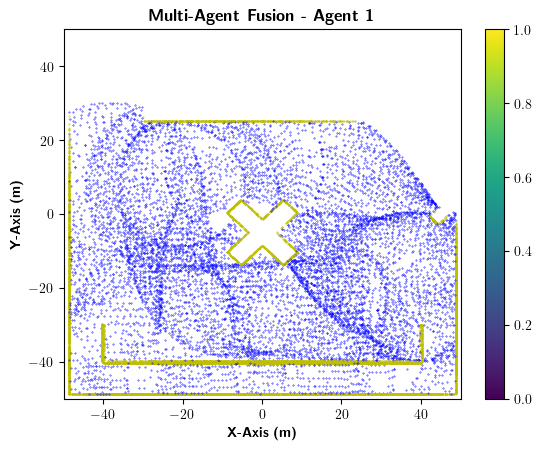

In [16]:
batch = agent1_data_loader.reset()

plt.figure()
plt.xlim(agent1_config.data.toysim.world_bounds[0], agent1_config.data.toysim.world_bounds[1])
plt.ylim(agent1_config.data.toysim.world_bounds[2], agent1_config.data.toysim.world_bounds[3])
plt.title(r"\textbf{Multi-Agent Fusion - Agent 1}")
plt.xlabel(r"\textbf{X-Axis (m)}")
plt.ylabel(r"\textbf{Y-Axis (m)}")

while agent1_data_loader.time_step < agent1_data_loader.max_steps():
    occupied_points = batch["lidar_data"][batch["occupancy"] == 1]
    empty_points = batch["lidar_data"][batch["occupancy"] == 0]

    plt.scatter(empty_points[:, 0], empty_points[:, 1], c="b", s=0.1)
    plt.scatter(occupied_points[:, 0], occupied_points[:, 1], c="y", s=0.1)

    batch = agent1_data_loader.step()

plt.colorbar()
plt.savefig("multi_agent1_dataset.png", dpi=300)
plt.show()

In [17]:
print(f"Number of Point Clouds: {agent2_data_loader.max_steps()}")

batch = agent2_data_loader.reset()

num_points: int = 0
num_occupied: int = 0
num_empty: int = 0

while agent2_data_loader.time_step < agent2_data_loader.max_steps():

    num_points += batch["lidar_data"].shape[0]
    num_occupied += batch["lidar_data"][batch["occupancy"] == 1].shape[0]
    num_empty += batch["lidar_data"][batch["occupancy"] == 0].shape[0]

    batch = agent2_data_loader.step()

print(f"Number of Points: {num_points}")
print(f"Number of Occupied Points: {num_occupied}")
print(f"Number of Empty Points: {num_empty}")
print(f"Percent Occupied: {num_occupied / num_points}%")
print(f"Percent Empty: {num_empty / num_points}%")

Number of Point Clouds: 367
Number of Points: 18350
Number of Occupied Points: 9759
Number of Empty Points: 8591
Percent Occupied: 0.5318256130790191%
Percent Empty: 0.4681743869209809%


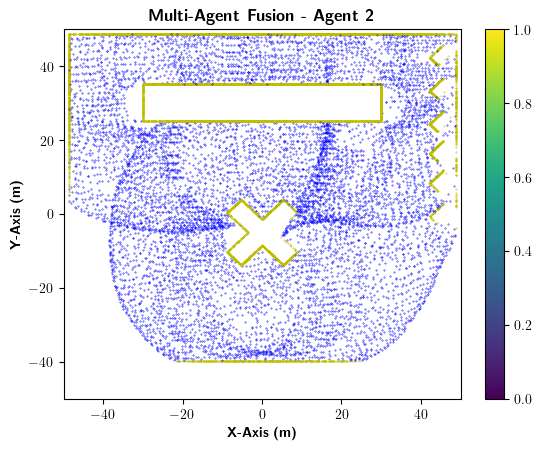

In [18]:
batch = agent2_data_loader.reset()

plt.figure()
plt.xlim(agent2_config.data.toysim.world_bounds[0], agent2_config.data.toysim.world_bounds[1])
plt.ylim(agent2_config.data.toysim.world_bounds[2], agent2_config.data.toysim.world_bounds[3])
plt.title(r"\textbf{Multi-Agent Fusion - Agent 2}")
plt.xlabel(r"\textbf{X-Axis (m)}")
plt.ylabel(r"\textbf{Y-Axis (m)}")

while agent2_data_loader.time_step < agent2_data_loader.max_steps():
    occupied_points = batch["lidar_data"][batch["occupancy"] == 1]
    empty_points = batch["lidar_data"][batch["occupancy"] == 0]

    plt.scatter(empty_points[:, 0], empty_points[:, 1], c="b", s=0.1)
    plt.scatter(occupied_points[:, 0], occupied_points[:, 1], c="y", s=0.1)

    batch = agent2_data_loader.step()

plt.colorbar()
plt.savefig("multi_agent2_dataset.png", dpi=300)
plt.show()